In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.company_data_pipeline import *
from src.ticker_data_pipeline import *
from src.model_pipeline import *
from src.model import Model
from sklearn.preprocessing import normalize

%matplotlib inline

In [3]:
# This function loads ticker data from the file, cleans it, and returns it as a pandas data frame
# It is slow.
# t_df = create_ticker_price_df()
# pickle_ticker_price_df(t_df)
ticker_df = unpickle_ticker_price_df()


# Takes the percent change and does some other cleaning
dif_df = diff_df(ticker_df)
# Plotting takes a few seconds
# dif_df.plot(legend=False)

In [4]:
company_df, tfidf, feature_names = get_company_description_df_and_feature_names()

In [5]:
m_ = Model(company_df, tfidf, feature_names, n_components=5)

In [6]:
m_.fit(dif_df)

/Users/Brian/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Gram == 'auto':


In [7]:
pickle_model(m_)
m = unpickle_model()

In [8]:
def draw_importances_graph(names, importances, title, ax):
    n = len(names)
    #ax.figure()
    ax.set_title(title, fontdict={'fontsize': 10})
    ax.bar(range(n), importances,
           color="r", align="center")
    ax.set_xticks(range(n))
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_xlim([-1, n])
    labels = ax.get_xticks()
    ax.tick_params(labelsize=20)

In [9]:
def graph_component(d):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 18))
    f.subplots_adjust(bottom=0.01)

    draw_importances_graph(d['companies_con'],
                           d['importances_con'], 
                           "Company Importances Con",
                           ax1)

    draw_importances_graph(d['words_con'],
                           d['word_importances_con'], 
                           "Word Importances Con",
                           ax2)

    draw_importances_graph(d['companies_pro'],
                           d['importances_pro'], 
                           "Company Importances Pro",
                           ax3)

    draw_importances_graph(d['words_pro'],
                           d['word_importances_pro'], 
                           "Word Importances Pro",
                           ax4)


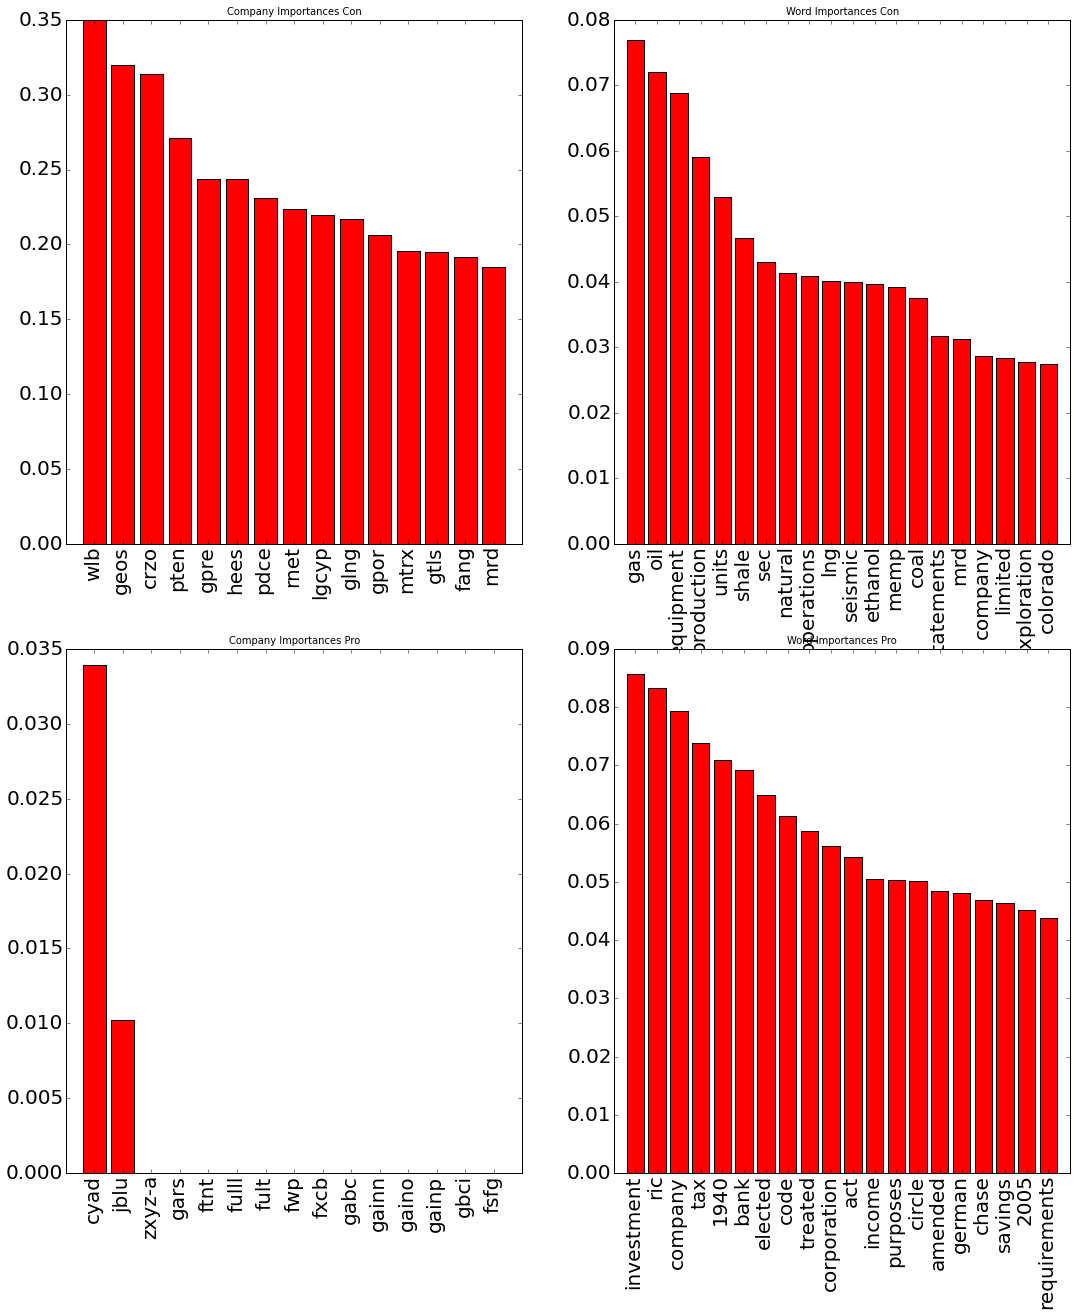

In [10]:
d = m.analyze_principle_component(3)
graph_component(d)

# one graph with all companies

In [11]:
# Components:
#     0 - Banking
#     1 - Biotech 
#     2 - International - China, Caymen Islands, Canada, Asia/Europe etc.  Does it 
#         reflect the value of the US Dollar?
#     3 - Oil, gas, coal
#     4 - Another Biotech and one Chinese social media company (fluke?)

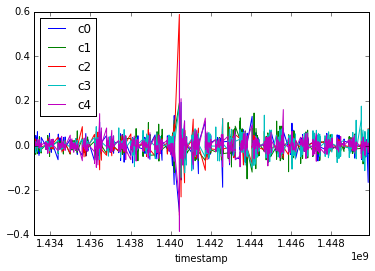

In [12]:
m.transform(dif_df).plot()


In [13]:
# We can clean up the data and get better results by finding a way to dedupe the list of
# companies.  Some are subsidiaries of the others and track very closely.  These are then 
# overrepresented in the data.

In [14]:
# We could try daily instead of hourly.  

In [15]:
# TODO: Weight the tfidf average by company importance.  